# Non linear analysis - Final project

Jérémie Engler and Laure Toullier

05.01.2024

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
from functions_definitions import *

In [2]:
file_path_baseend = (r'C:\Users\ltoul\Python\ANALYSE NON LINEAIRE\Non-Linear-Analysis\PROJECT\C1\Base end moment-chord rotation response\C1.csv')
file_path_topend = (r'C:\Users\ltoul\Python\ANALYSE NON LINEAIRE\Non-Linear-Analysis\PROJECT\C1\Top end moment-chord rotation response\C1_Top.csv')
file_path_loadingprotocol = (r'C:\Users\ltoul\Python\ANALYSE NON LINEAIRE\Non-Linear-Analysis\PROJECT\C1\Loading protocol\C1.csv')

### A - Graph generation (for Q2)

In [29]:
def animate(x, y, duration=10, interval=5, ax=None):

    x = np.array(x)
    y = np.array(y)

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()

    title = ax.set_title("Iteration 0 (0%)")
    line, = plt.plot(x[:1], y[:1])
    ax.dataLim.x0 = x.min()
    ax.dataLim.x1 = x.max()
    ax.dataLim.y0 = y.min()
    ax.dataLim.y1 = y.max()

    step = int((x.size*interval/1000) // duration)
    print(f"{step = }")
    step = max(1, step)
    step = min(x.size, step)
    n = x.size // step

    def plot_until(i):
        it = i*step
        title.set_text(f"Iteration {it} ({it/x.size:.1%})")
        line.set_data(x[:it+1], y[:it+1])

    a = FuncAnimation(fig, plot_until, frames=n, interval=5)
    plt.show()

In [3]:
def csv_plot(file_path, file_name):

    data = pd.read_csv(file_path).drop(pd.read_csv(file_path).columns[0], axis = 1)
    col=list(data.columns)

    if 'Base moment [kN.m]' in col :
        a=data['Rotation']
        a_text='Rotation [rad]'
        b=data['Base moment [kN.m]']
        b_text='Base moment [kN.m]'
        c = data['Axial_Disp. [mm]']
        c_text='Axial displacement [mm]'
        
        donnees=[a,b,c]
        plt.plot(c , a, linestyle='-', linewidth=1, color='green', label=f'{c_text} vs {a_text}')
        plt.xlabel(c_text)
        plt.ylabel(a_text)
        plt.title(f'Relation entre {c_text} et {a_text}')
        plt.legend()
        
        plt.axline((0, -0.01), slope=0, ls="--")
        plt.axline((0, 0.01), slope=0, ls="--")
        plt.show()

    elif 'Top moment [kN.m]' in col :
        b=data['Top moment [kN.m]']
        b_text='Top moment [kN.m]'
        a=data['Rotation']
        a_text='Rotation [rad]'
        donnees=[a,b]
        #plt.axline((0, -2659.98658), slope=0, ls="--")
        #plt.axline((0, 2659.98658), slope=0, ls="--")
    
 
    elif 'Time[sec]' in col :
        a = data['Time[sec]']
        a_text='Time[sec]'
        b=data['Top_Inplane_Disp[mm]']
        b_text='Top inplane displacement [mm]'
        donnees=[a,b]

    plt.plot(a, b, linestyle='-', linewidth=1, color='green', label=f'{a_text} vs {b_text}')
    # Ajouter des labels et un titre
    plt.xlabel(a_text)
    plt.ylabel(b_text)
    if 'Base moment [kN.m]' in col :
        #plt.axline((0.01, 0), slope=float('inf'),  ls="--")
        #plt.axline((-0.01, 0), slope=float('inf'),  ls="--")
        #plt.plot([0.008984774],[ 2659.98658], "ro")
        #plt.plot([-0.008984774],[ -2659.98658], "ro")
        plt.plot([0.008984774],[ 2659.98658], "ro")
        plt.plot([-0.008984774],[ -2659.98658], "ro")
    elif 'Top moment [kN.m]' in col :
        plt.axline((0.01, 0), slope=float('inf'),  ls="--")
        plt.axline((-0.01, 0), slope=float('inf'),  ls="--")
        plt.plot([0.007568781945803],[  2740.64656120949], "ro")
        plt.plot([-0.007568781945803],[  -2740.64656120949], "ro")

    plt.title(f'Relation entre {a_text} et {b_text}')
    plt.legend()

    # Afficher le graphique
    plt.show()

    #for i in donnees:
        #if i=='Axial_Disp. [mm]':
            #plt.plot(c , b, linestyle='-', linewidth=1, color='green', label=f'{c_text} vs {b_text}')
            #plt.xlabel(c_text)
            #plt.ylabel(b_text)
            #plt.title(f'Relation entre {c_text} et {b_text} (Diagramme de lignes), file: {file_name}')
            #plt.legend()
            #plt.show()
    

    return None

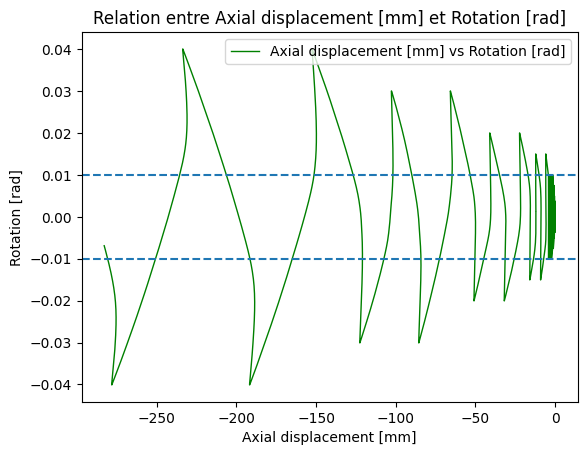

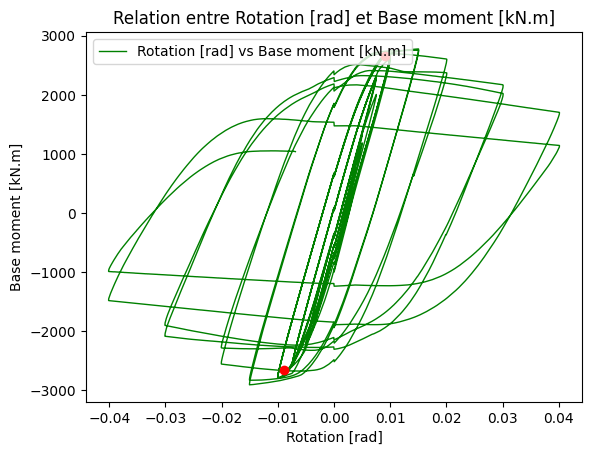

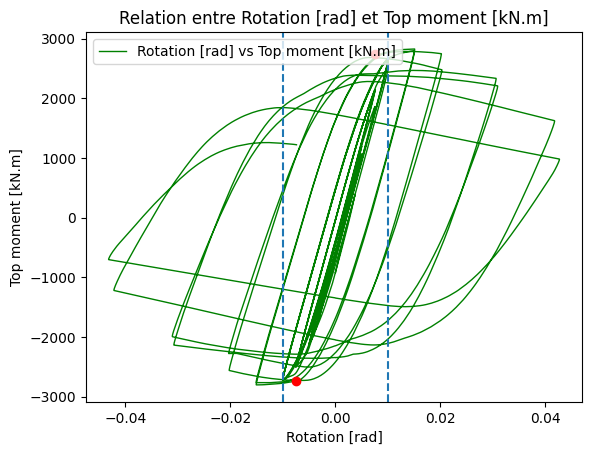

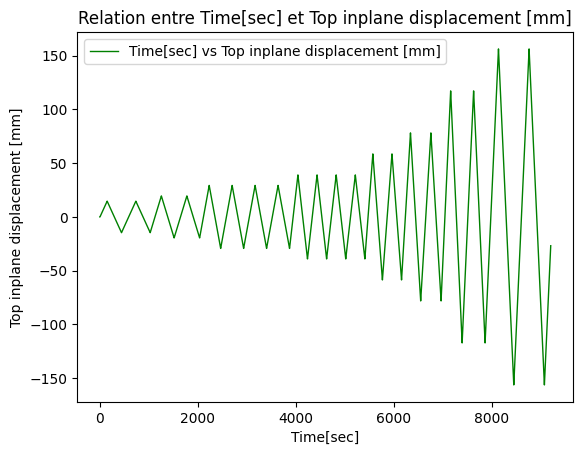

In [4]:
csv_plot(file_path_baseend, "oui")
csv_plot(file_path_topend, "oui")
csv_plot(file_path_loadingprotocol, "oui")

### B - Critical limit states on the measured hysteretic behaviour from the experiment 

In [41]:
#flexural yielding at top

def flex_yielding_top(file_path):

    data = pd.read_csv(file_path).drop(pd.read_csv(file_path).columns[0], axis = 1)
    col=list(data.columns)

    if 'Top moment [kN.m]' in col:
        rot=data['Rotation']
        M=data['Top moment [kN.m]']
        a=(rot.iloc[1]-rot.iloc[0])/(M.iloc[1]-M.iloc[0])
        My=M.iloc[20077]
        theta_y=rot.iloc[20077]

        #elastic part
        #for i in range(len(data['Top moment [kN.m]']-1)):
        #    b=(rot.iloc[i+1]-rot.iloc[i])/(M.iloc[i+1]-M.iloc[i])

        #    if np.isclose(a, b, rtol=1e-03, atol=1e-03, equal_nan=False):
        #        a=b
        #    else:
        #        My=M.iloc[i]
        #        theta_y=rot.iloc[i]
        print(f"flexural yielding My: {My} Nmm")
        print(f"elastic rotation theta_y: {theta_y} rad")
               
        a_text='Rotation [rad]'
        b_text='Top moment [kN.m]'
        plt.plot(rot , M, linestyle='-', linewidth=1, color='green', label=f'{b_text} vs {a_text}')
        plt.xlabel(a_text)
        plt.ylabel(b_text)
        plt.title(f'Relation entre {b_text} et {a_text}')
        plt.legend()
        plt.plot([theta_y],[My], "ro")
        #plt.plot([-theta_y],[  -My], "ro")
        plt.show()
        #        break

        
        #ultimate rotation
        Mu=M.max()
        print(f"Maximum moment Mu : {Mu} Nmm")
        iMu=M.index[M==Mu]
        theta_u=rot.iloc[iMu]
        print(f"maximum plastic rotation theta_u : {theta_u} rad")
        
        Mumin=M.min()
        print(f"Minimum moment Mu : {Mumin} Nmm")
        iMumin=M.index[M==Mumin]
        theta_umin=rot.iloc[iMumin]
        print(f"minimum plastic rotation theta_u : {theta_umin} rad")
    
        a_text='Rotation [rad]'
        b_text='Top moment [kN.m]'
        plt.plot(rot , M, linestyle='-', linewidth=1, color='green', label=f'{b_text} vs {a_text}')
        plt.xlabel(a_text)
        plt.ylabel(b_text)
        plt.title(f'Relation entre {b_text} et {a_text}')
        plt.legend()
        plt.plot([theta_u],[Mu], "ro")
        plt.plot([theta_umin],[Mumin], "ro")
        plt.show()

        #theta_p=theta_c-theta_y
        #print(f"Pre peak plastic rotation: {theta_p =} rad")



                
        return My, theta_y, Mu, theta_u
        


In [37]:
#flexural yielding at base

def flex_disp_base(file_path):

    data = pd.read_csv(file_path).drop(pd.read_csv(file_path).columns[0], axis = 1)
    col=list(data.columns)

    if 'Base moment [kN.m]' in col:
        rot=data['Rotation']
        M=data['Base moment [kN.m]']
        disp=data['Axial_Disp. [mm]']
        
        #flexural yielding
        a=abs((M.iloc[1]-M.iloc[0])/(rot.iloc[1]-rot.iloc[0]))
        dM = np.diff(M)
        dr = np.diff(rot)
        deriv = dM/dr
        i = (np.isclose(deriv, a, rtol=0, atol=1e-3))
        My=M.iloc[20077]
        theta_y=rot.iloc[20077]

        #for i in range(len(data['Base moment [kN.m]'])-1):
            #b=abs((M.iloc[i+1]-M.iloc[i])/(rot.iloc[i+1]-rot.iloc[i]))

            #if np.isclose(a, b, atol=1e-03, equal_nan=False):
            #    a=(b)
            #else:
                #My=M.iloc[i]
                #theta_y=rot.iloc[i]
                #num=i+1
                #d=disp.iloc[i]
        print(f'My : {My} Nmm')
        print(f'{theta_y =}')
                #print(f'displacement at the yielding moment: {d} mm')

        a_text='Rotation [rad]'
        b_text='Base moment [kN.m]'
        plt.plot(rot , M, linestyle='-', linewidth=1, color='green', label=f'{b_text} vs {a_text}')
        plt.xlabel(a_text)
        plt.ylabel(b_text)
        plt.title(f'Relation entre {b_text} et {a_text}')
        plt.legend()
        plt.plot([theta_y],[My], "ro")
        #plt.plot([-theta_y],[  -My], "ro")
        plt.show()

                #break

        #ultimate rotation
        Mu=M.max()
        print(f"Maximum moment Mu : {Mu} Nmm")
        iMu=M.index[M==Mu]
        theta_u=rot.iloc[iMu]
        print(f"maximum plastic rotation theta_u : {theta_u} rad")

        Mumin=M.min()
        print(f"Minimum moment Mu : {Mumin} Nmm")
        iMumin=M.index[M==Mumin]
        theta_umin=rot.iloc[iMumin]
        print(f"minimum plastic rotation theta_u : {theta_umin} rad")
    
        a_text='Rotation [rad]'
        b_text='Base moment [kN.m]'
        plt.plot(rot , M, linestyle='-', linewidth=1, color='green', label=f'{b_text} vs {a_text}')
        plt.xlabel(a_text)
        plt.ylabel(b_text)
        plt.title(f'Relation entre {b_text} et {a_text}')
        plt.legend()
        plt.plot([theta_u],[Mu], "ro")
        plt.plot([theta_umin],[Mumin], "ro")
        plt.show()
        

        #local buckling
        for i in range(len(data['Rotation'])):
            if rot.iloc[i]>np.abs(0.01):
                buck=disp.iloc[i]
                Mbuck=M.iloc[i]
                Rbuck=rot.iloc[i]
                print(f'Buckling displacement : {buck} mm')
                print(f'Rotation at buckling : {Rbuck} rad')
                print(f'Bending moment at buckling {Mbuck} kNm')
                break


    

    
    return My, theta_y, Mu, theta_u,  buck
  

My : 2369.158436 Nmm
theta_y =0.007691132


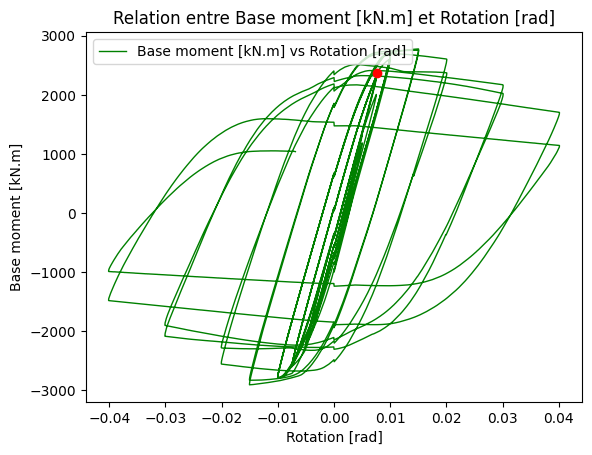

Maximum moment Mu : 2776.807649 Nmm
maximum plastic rotation theta_u : 27828    0.015025
Name: Rotation, dtype: float64 rad
Minimum moment Mu : -2913.651684 Nmm
minimum plastic rotation theta_u : 28803   -0.015023
Name: Rotation, dtype: float64 rad


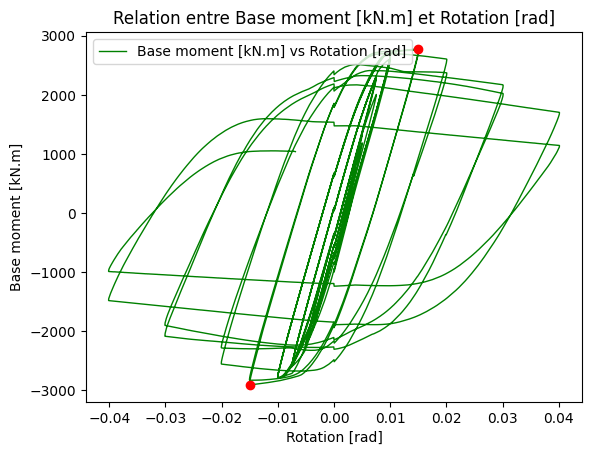

Buckling displacement : -1.492795534 mm
Rotation at buckling : 0.010014732 rad
Bending moment at buckling 2609.78317 kNm


(2369.158436,
 0.007691132,
 2776.807649,
 27828    0.015025
 Name: Rotation, dtype: float64,
 -1.492795534)

In [38]:
flex_disp_base(file_path_baseend)



flexural yielding My: 2195.01813955671 Nmm
elastic rotation theta_y: 0.0076934823062908 rad


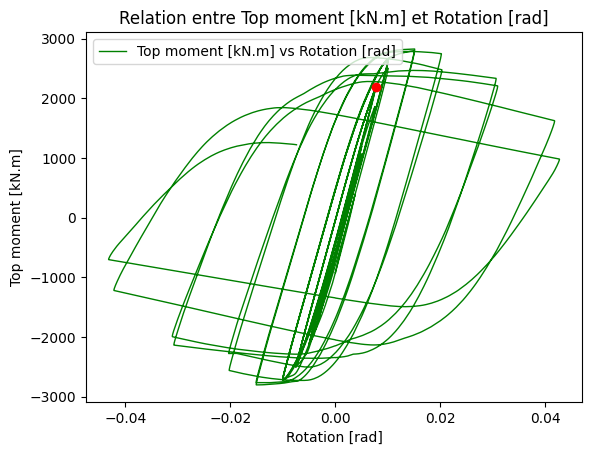

Maximum moment Mu : 2828.17988944537 Nmm
maximum plastic rotation theta_u : 29778    0.015069
Name: Rotation, dtype: float64 rad
Minimum moment Mu : -2801.41723257191 Nmm
minimum plastic rotation theta_u : 28796   -0.014842
Name: Rotation, dtype: float64 rad


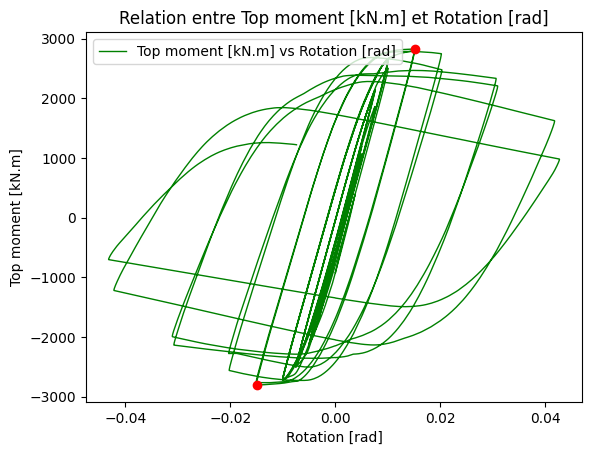

(2195.01813955671,
 0.0076934823062908,
 2828.17988944537,
 29778    0.015069
 Name: Rotation, dtype: float64)

In [42]:
flex_yielding_top(file_path_topend)

### C - Parameters for the monotonic backbone (for Q5)

In [11]:
#XS variables: W24x146

Z= 6.8498*10**(+6) #152724 #mm^3 - plastic modulus of the XS: 93.2 inch^3
I = 1.906*10**9 #mm^4 - second moment of area about the principal axis y
ratio1=33.3 #h/tw
ratio2=51.7 #Lb/ry
ratio3=6.1 #bf/2tf

h=630 #mm
d=630 #mm
tw=17.3 #mm
bf=326 #mm
tf=26.9 #mm
iz=75.5 #mm
L=3901 #mm
Aw=(h-tf)*tw
print(Aw)



10433.630000000001


In [12]:
#variables

fy=414 #MPa - yield strength from the paper
E=190481 #MPa - Elastic modulus
Pye=11411 #kN - axial yielding strength
Pg=0.2*Pye #kN - gravity induced compressive load

fyn = 354 #MPa - nominal yield strength from the paper
Ry= 1.1 #expected to nominal yield stress ratio (from Table A3.1, AISC 341-10)

poisson=0.3
G=E/(2+2*poisson)

print(Pg)



2282.2000000000003


In [13]:
#yield deformation

def elastic_stiffness(G,Aw,E,I,L):

    #shear stiffness
    Ks=G*Aw/L

    #flexural stiffness
    Kb=12*E*I/L**3

    #elastic stiffness
    Ke=L**2*Ks*Kb/(2*(Ks+Kb))
    print(f"elastic stiffness: {Ke =}")

    return Ke

In [14]:
#flexural_strength_parameters

def flexural_strength_param(Pg,Pye):

    #effective yield strength
    if Pg/Pye<0.2:
        My=1.15*Z*Ry*fyn*(1-0.5*Pg/Pye)
    else:
        My=1.15*Z*Ry*fyn*9/8*(1-Pg/Pye)
    print(f"Effective yield strength : {My=} N/mm")

    #hardening ratio
    a=12.5*(ratio1**(-0.2))*(ratio2**(-0.4))*(1-Pg/Pye)**(0.4)
    if a<1:
        a=1
    elif a>1.3:
        a=1.3
    print(f"Hardening ratio : {a =}")

    #residual flexural strength
    Mr= (0.5-0.4*Pg/Pye)*My
    print(f"Residual flexural strength: {Mr=} N/mm")

    return My, a, Mr

In [15]:
#plastic deformation parameters

def plastic_deformation_param(Pg,Pye):


    #pre-peak plastic rotation
    theta_P=294*(ratio1)**(-1.7)*(ratio2)**(-0.7)*(1-Pg/Pye)**(1.6)
    if theta_P>0.2:
        theta_P=0.2
    print(f"pre-peak plastic rotation: {theta_P =} rad")

    #post-peak plastic deformation capacity
    theta_pc=90*(ratio1)**(-0.8)*(ratio2)**(-0.8)*(1-Pg/Pye)**2.5
    if theta_pc>0.3:
        theta_pc=0.3
    print(f"pre-peak plastic rotation: {theta_pc=} rad")

    #ultimate rotation
    theta_u=0.15
    print(f"ultimate rotation: {theta_u=} rad")

    return theta_P, theta_pc, theta_u

In [16]:
#reference cumulative plastic rotation capacity

def f_lambda_s(Pg,Pye):
    if Pg/Pye>0.35:
        lambda_s=268000*(ratio1)**(-2.3)*(ratio2)**(-1.30)*(1-Pg/Pye)**1.19
    else:
        lambda_s=25000*(ratio1)**(-2.14)*(ratio2)**(-0.53)*(1-Pg/Pye)**4.92
    
    print(f"reference cumulative plastic rotation capacity: {lambda_s=}")

    return lambda_s

#note: this parameter controls the cyclic basic strength deteriration of a steel column

In [17]:
My, a, Mr=flexural_strength_param(Pg,Pye)
theta_P, theta_pc, theta_u= plastic_deformation_param(Pg,Pye)
lambda_s=f_lambda_s(Pg,Pye)
Ke=elastic_stiffness(G,Aw,E,I,L)

Effective yield strength : My=2760668044.2000003 N/mm
Hardening ratio : a =1.1702022905605447
Residual flexural strength: Mr=1159480578.5640001 N/mm
pre-peak plastic rotation: theta_P =0.03355001606587252 rad
pre-peak plastic rotation: theta_pc=0.1328065991531829 rad
ultimate rotation: theta_u=0.15 rad
reference cumulative plastic rotation capacity: lambda_s=0.5688032866064358
elastic stiffness: Ke =406251211486.0713
